In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from moviepy.editor import VideoFileClip
from PIL import Image
import os

def convert_mp4_to_frames(input_folder, output_directory, frame_rate):
    # Get a list of all video files in the input folder
    video_files = [os.path.join(input_folder, file) for file in os.listdir(input_folder) if file.endswith('.mp4')]

    # Process each video file
    for input_file in video_files:
        clip = VideoFileClip(input_file)
        frames = clip.iter_frames(fps=frame_rate)

        if not os.path.exists(output_directory):
            os.makedirs(output_directory)

        frame_count = 1
        for frame in frames:
            output_path = os.path.join(output_directory, f"{os.path.basename(input_file)}_frame_{frame_count:04d}.jpg")
            frame_count += 1
            frame_image = Image.fromarray(frame)
            frame_image.save(output_path)

# Example usage
frame_rate = 1
input_folder = '/content/drive/MyDrive/VideoArrest/'
output_directory = '/content/drive/MyDrive/ArrestFrame'
convert_mp4_to_frames(input_folder, output_directory, frame_rate)

input_folder = '/content/drive/MyDrive/VideoAbuse/'
output_directory = '/content/drive/MyDrive/AbuseFrame'
convert_mp4_to_frames(input_folder, output_directory, frame_rate)

input_folder = '/content/drive/MyDrive/VideoAssault/'
output_directory = '/content/drive/MyDrive/AssaultFrame'
convert_mp4_to_frames(input_folder, output_directory, frame_rate)

input_folder = '/content/drive/MyDrive/VideoFighting/'
output_directory = '/content/drive/MyDrive/FightFrame'
convert_mp4_to_frames(input_folder, output_directory, frame_rate)

input_folder = '/content/drive/MyDrive/VideoBurglary/'
output_directory = '/content/drive/MyDrive/BurFrame'
convert_mp4_to_frames(input_folder, output_directory, frame_rate)





  warnings.warn("Warning: in file %s, "%(self.filename)+



In [ ]:
!pip install imagehash

In [ ]:
!pip install pillow

Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest2.mp4_frame_0033.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest1.mp4_frame_0003.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest1.mp4_frame_0004.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest1.mp4_frame_0005.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest1.mp4_frame_0034.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest1.mp4_frame_0036.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest1.mp4_frame_0037.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest2.mp4_frame_0004.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest2.mp4_frame_0005.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest2.mp4_frame_0014.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest2.mp4_frame_0016.jpg
Duplicate frame found: /content/drive/MyDrive/ArrestFrame/Arrest2

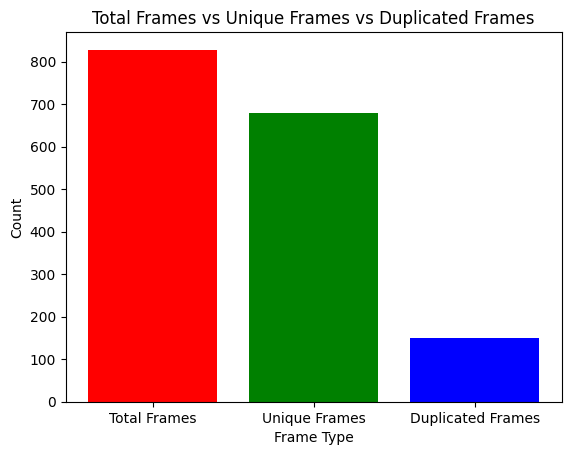

In [ ]:
import os
import cv2
import imagehash
from PIL import Image
import matplotlib.pyplot as plt

# Function to calculate pHash for an image
def calculate_phash(image_path):
    image = Image.open(image_path)
    image_hash = imagehash.phash(image)
    return image_hash

# Function to remove duplicate frames and return counts
def remove_duplicate_frames(input_folders, output_folders):
    total_frames = 0
    unique_frames = 0
    duplicated_frames = 0

    for input_folder, output_folder in zip(input_folders, output_folders):
        if not os.path.exists(output_folder):
            os.makedirs(output_folder)

        frame_hashes = set()  # Set to store unique frame hashes

        for root, _, files in os.walk(input_folder):
            for filename in files:
                if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                    total_frames += 1
                    image_path = os.path.join(root, filename)
                    image_hash = calculate_phash(image_path)

                    # Check if the hash is not in the set (i.e., a unique frame)
                    if image_hash not in frame_hashes:
                        frame_hashes.add(image_hash)
                        output_path = os.path.join(output_folder, filename)
                        cv2.imwrite(output_path, cv2.imread(image_path))
                        unique_frames += 1
                    else:
                        duplicated_frames += 1
                        print(f"Duplicate frame found: {image_path}")

    return total_frames, unique_frames, duplicated_frames

if __name__ == "__main__":
    input_folders = [
        '/content/drive/MyDrive/ArrestFrame',
        '/content/drive/MyDrive/AbuseFrame',
        '/content/drive/MyDrive/AssaultFrame',
        '/content/drive/MyDrive/FightFrame',
        '/content/drive/MyDrive/BurFrame'
    ]

    output_folders = [
        '/content/drive/MyDrive/ArrestOFrame',
        '/content/drive/MyDrive/AbuseOFrame',
        '/content/drive/MyDrive/AssaultOFrame',
        '/content/drive/MyDrive/FightOFrame',
        '/content/drive/MyDrive/BurOFrame'
    ]

    total_frames, unique_frames, duplicated_frames = remove_duplicate_frames(input_folders, output_folders)

    # Plotting the bar graph
    categories = ['Total Frames', 'Unique Frames', 'Duplicated Frames']
    counts = [total_frames, unique_frames, duplicated_frames]

    plt.bar(categories, counts, color=['red', 'green', 'blue'])

    # Adding labels and title
    plt.xlabel('Frame Type')
    plt.ylabel('Count')
    plt.title('Total Frames vs Unique Frames vs Duplicated Frames')

    # Displaying the graph
    plt.show()
